This notebook performs clustering on a local dataset. First, clustering is performed using k=6. After this step, intra-cluster clustering is performed using k=3. Clusters are saved to local storage.

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans

import os

In [2]:
num_clusters = 3

In [3]:
clusters = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']

# Extracting LAB Features

In [4]:
def extract_lab_features(image):
    # Identify black pixels in the original image (RGB values are all zero)
    black_mask = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) == 0
    # Create an inverse mask for non-black pixels
    non_black_mask = ~black_mask

    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    L_channel, A_channel, B_channel = cv2.split(lab_image)

    # Apply the non-black mask to each channel
    L_non_black = L_channel[non_black_mask]
    A_non_black = A_channel[non_black_mask]
    B_non_black = B_channel[non_black_mask]

    if L_non_black.size == 0:
        l_mean = 0
        a_mean = 0
        b_mean = 0
    else:
        l_mean = np.mean(L_non_black)
        a_mean = np.mean(A_non_black)
        b_mean = np.mean(B_non_black)

    return l_mean, a_mean, b_mean

In [6]:
def parse_images_and_perform_clustering(current_cluster):
    filenames = []
    l_values = []
    a_values = []
    b_values = []
    base_image_path = f'../clusters/6-clusters/{current_cluster}/'
    images = os.listdir(base_image_path)
    for image_file in tqdm(images, desc="Parsing images"):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            full_image_path = os.path.join(base_image_path, image_file)
            image = cv2.imread(full_image_path)
            if image is None:
                print(f"Error: Unable to read image at {full_image_path}")
                continue
            
            l_mean, a_mean, b_mean = extract_lab_features(image)
            
            filenames.append(full_image_path)
            l_values.append(l_mean)
            a_values.append(a_mean)
            b_values.append(b_mean)    

    df = pd.DataFrame({
        'filename': filenames,
        'L': l_values,
        'A': a_values,
        'B': b_values
    })

    X = df[['L', 'A', 'B']]
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    df['cluster'] = kmeans.labels_

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot points with different colors for each cluster
    scatter = ax.scatter(l_values, a_values, b_values, 
                        c=df['cluster'], 
                        cmap='viridis',
                        s=100,
                        alpha=0.6)

    # Plot cluster centers
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
            c='red', 
            marker='x', 
            s=200, 
            linewidth=3, 
            label='Centroids')

    # Customize the plot
    ax.set_xlabel('L* (Lightness)')
    ax.set_ylabel('a* (Green-Red)')
    ax.set_zlabel('b* (Blue-Yellow)')
    ax.set_title('3D Clustering of LAB Color Space')

    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), 
                        title="Clusters")
    ax.add_artist(legend1)
    ax.legend()

    # Add grid
    ax.grid(True)

    # Adjust the viewing angle for better visualization
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    plt.show()

    return df

# Image Saving

In [7]:
def copy_images_to_clusters(df, base_output_dir):
    import shutil
    import os

    print(f"Base output directory: {base_output_dir}")
    os.makedirs(base_output_dir, exist_ok=True)

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Copying images"):
        source_path = row['filename']
        cluster = row['cluster']
        
        cluster_dir = os.path.join(base_output_dir, f"cluster_{cluster}")
        os.makedirs(cluster_dir, exist_ok=True)
        
        filename = os.path.basename(source_path)
        dest_path = os.path.join(cluster_dir, filename)
        
        try:
            shutil.copy2(source_path, dest_path)
        except Exception as e:
            print(f"Error copying file: {e}")

Processing cluster cluster_0


Parsing images: 100%|██████████| 147/147 [00:01<00:00, 126.09it/s]
c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


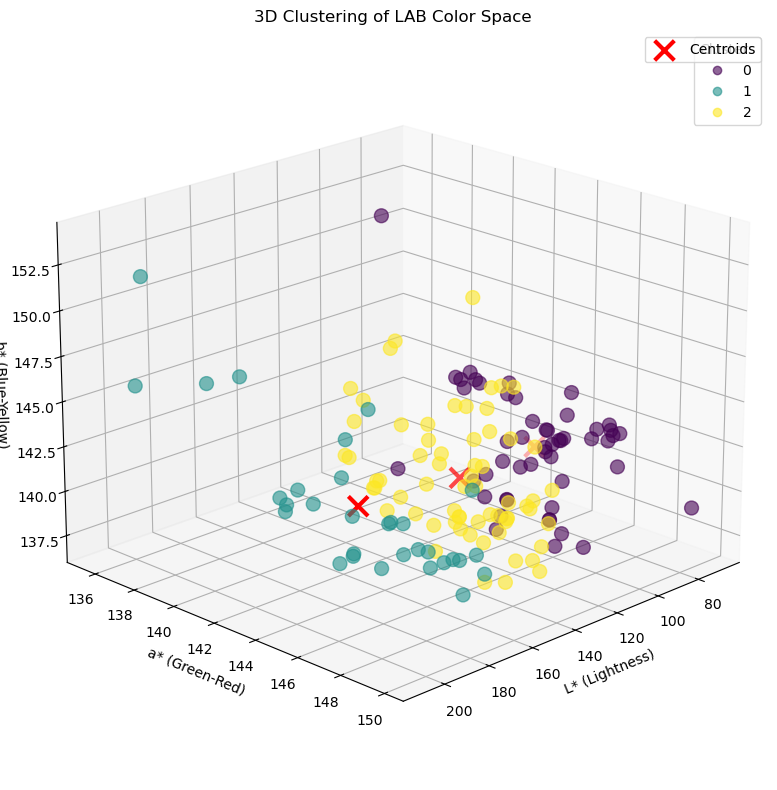

Base output directory: ../clusters/6-clusters/cluster_0/intra_cluster_3


Copying images: 100%|██████████| 147/147 [00:00<00:00, 617.65it/s]


Processing cluster cluster_1


Parsing images: 100%|██████████| 261/261 [00:02<00:00, 122.99it/s]
c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


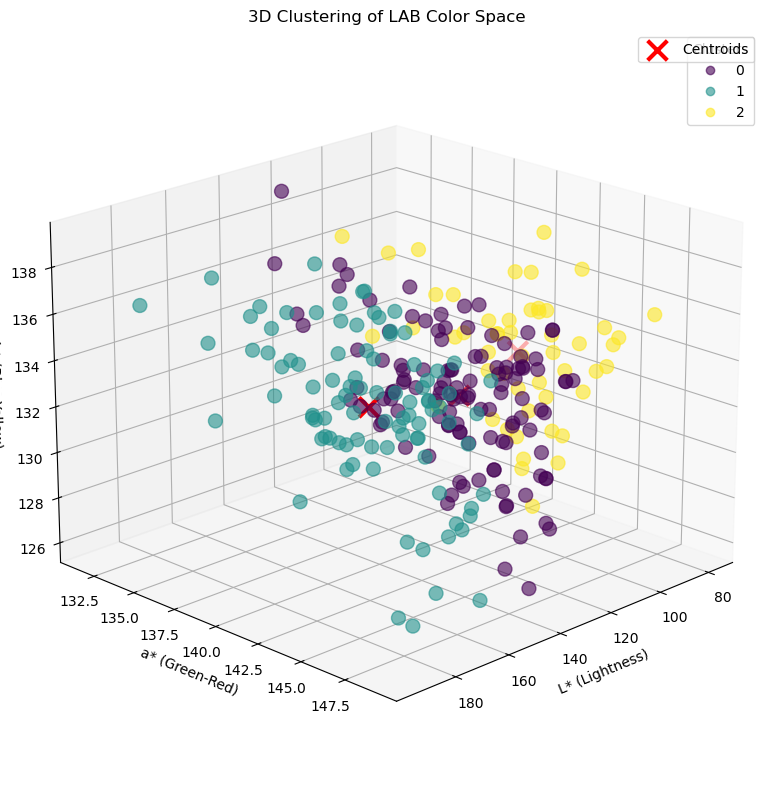

Base output directory: ../clusters/6-clusters/cluster_1/intra_cluster_3


Copying images: 100%|██████████| 261/261 [00:00<00:00, 807.23it/s]


Processing cluster cluster_2


Parsing images: 100%|██████████| 228/228 [00:01<00:00, 143.93it/s]
c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


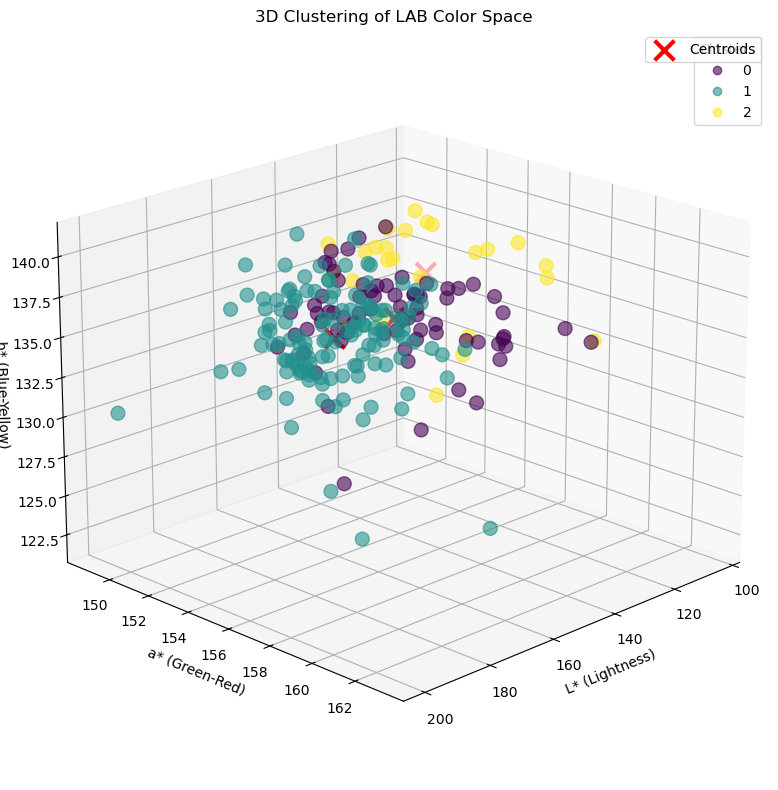

Base output directory: ../clusters/6-clusters/cluster_2/intra_cluster_3


Copying images: 100%|██████████| 228/228 [00:00<00:00, 946.19it/s]


Processing cluster cluster_3


Parsing images: 100%|██████████| 11/11 [00:00<00:00, 50.39it/s]
c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


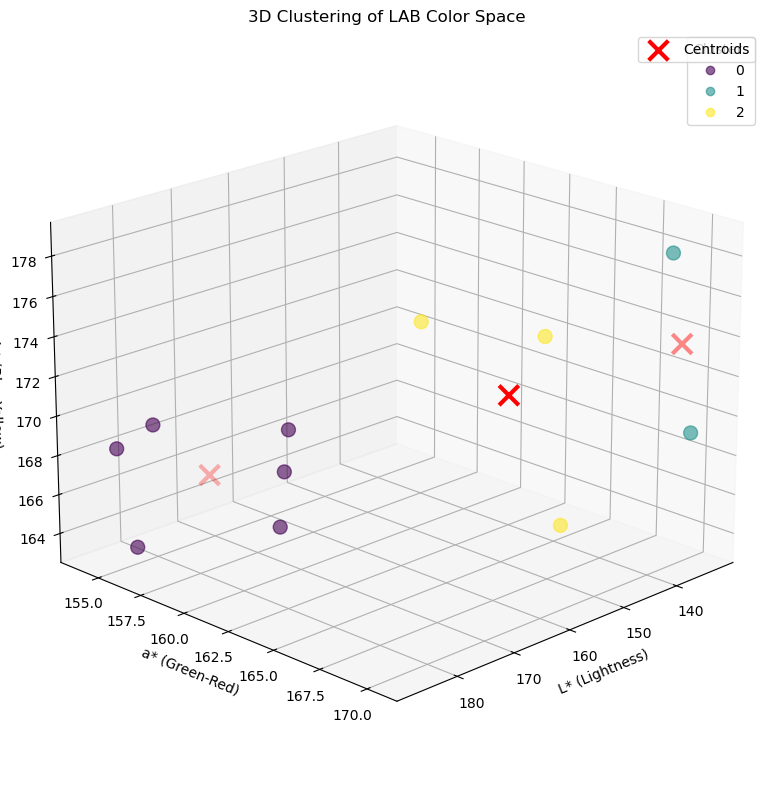

Base output directory: ../clusters/6-clusters/cluster_3/intra_cluster_3


Copying images: 100%|██████████| 11/11 [00:00<00:00, 472.68it/s]


Processing cluster cluster_4


Parsing images: 100%|██████████| 97/97 [00:01<00:00, 53.38it/s]
c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


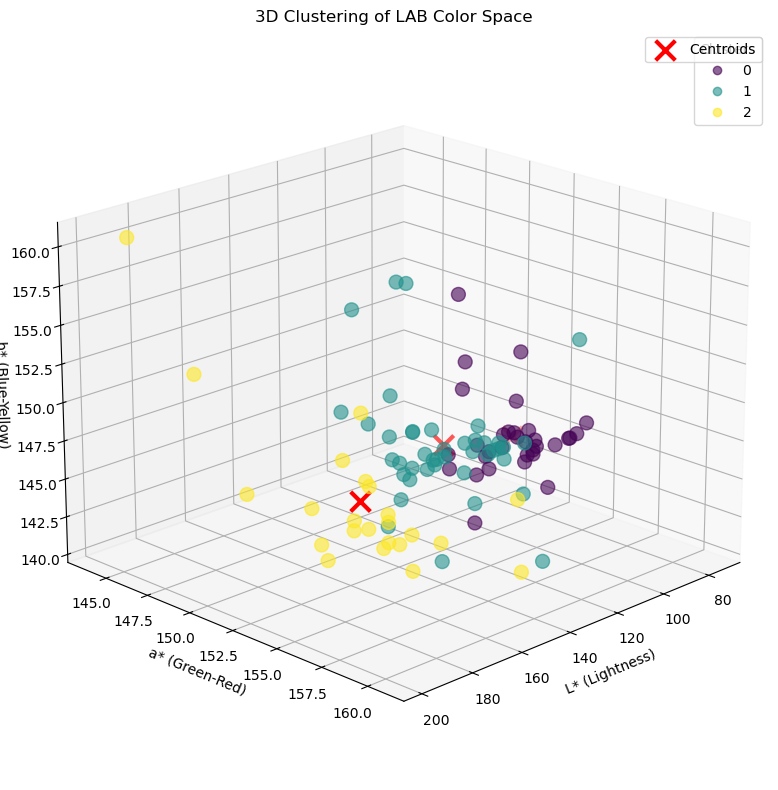

Base output directory: ../clusters/6-clusters/cluster_4/intra_cluster_3


Copying images: 100%|██████████| 97/97 [00:00<00:00, 710.89it/s]


Processing cluster cluster_5


Parsing images: 100%|██████████| 150/150 [00:02<00:00, 52.61it/s]
c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


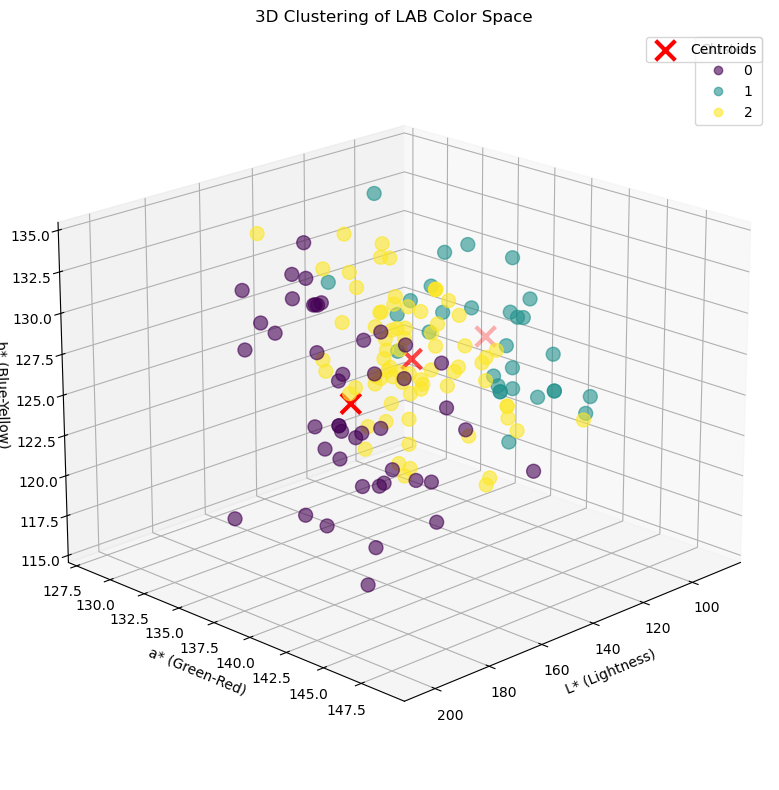

Base output directory: ../clusters/6-clusters/cluster_5/intra_cluster_3


Copying images: 100%|██████████| 150/150 [00:00<00:00, 684.14it/s]


In [8]:
for cluster in clusters:
    print(f"Processing cluster {cluster}")
    df = parse_images_and_perform_clustering(cluster)
    base_output_dir = f"../clusters/6-clusters/{cluster}/intra_cluster_{num_clusters}"
    copy_images_to_clusters(df, base_output_dir)